## Import libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from utils import load_wb_csv, filter_countries, reshape_long

## Load and Prepare Economic Data

### Define Dataset Files
- List all CSV files containing economic indicators
- Includes total, male, female unemployment rate, poverty headcount ratio, literacy rate, electric power consumption, education expenditure ratio and health expenditure

### Load CSV Files
- Use a helper function `load_wb_csv` to read each CSV into a pandas DataFrame
- Store all datasets in a dictionary for easy access

### Load Regions
- Read regions.csv to get ISO alpha-3 country codes

### Filter Countries
- Keep only valid countries based on the alpha-3 codes
- Remove aggregates or non-country entries

In [3]:
# Define dataset filenames for economic indicators
files = {
    "gdp": "gdp.csv",
    "unemployment_rate": "unemployment_rate.csv",
    "male_unemployment_rate": "male_unemployment_rate.csv",
    "female_unemployment_rate": "female_unemployment_rate.csv",
    "poverty_headcount_ratio": "poverty_headcount_ratio.csv",
    "literacy_rate": "literacy_rate.csv",
    "electric_power_consumption": "electric_power_consumption.csv",
    "education_expenditure_ratio": "education_expenditure_ratio.csv",
    "current_health_expenditure_ratio": "current_health_expenditure_ratio.csv",
    "current_health_expenditure_per_capita": "current_health_expenditure_per_capita.csv"
}

# Load each CSV file using a helper function and store in a dictionary
datasets = {name: load_wb_csv(fname) for name, fname in files.items()}

# Load regions
df_regions = pd.read_csv(r"D:\_Analysis\Projects\Global Indicators\Data\regions.csv")
alpha3_list = df_regions["alpha-3"].unique()

# Filter countries
for key in datasets:
    datasets[key] = filter_countries(datasets[key], alpha3_list)

print("Datasets loaded and cleaned successfully!")

Datasets loaded and cleaned successfully!


In [4]:
print(datasets["gdp"].head())

  Country Code  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
0          ABW   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2          AFG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          AGO   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5          ALB   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6          AND   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

           2015          2016          2017          2018          2019  \
0  2.962907e+09  2.983635e+09  3.092429e+09  3.276184e+09  3.395799e+09   
2  1.913422e+10  1.811657e+10  1.875346e+10  1.805322e+10  1.879944e+10   
4  9.049642e+10  5.276162e+10  7.369015e+10  7.945069e+10  7.089796e+10   
5  1.147017e+10  1.198867e+10  1.325827e+10  1.537951e+10  1.558511e+10   
6  2.789881e+09  2.896610e+09  3.000162e+09  3.218420e+09  3.155149e+09   

           2020          2021          2022          2023          2024  
0  2.481857e

In [5]:
datasets["gdp"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 265
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  215 non-null    object 
 1   1960          111 non-null    float64
 2   1961          113 non-null    float64
 3   1962          115 non-null    float64
 4   1963          115 non-null    float64
 5   1964          115 non-null    float64
 6   1965          121 non-null    float64
 7   1966          122 non-null    float64
 8   1967          125 non-null    float64
 9   1968          126 non-null    float64
 10  1969          126 non-null    float64
 11  1970          146 non-null    float64
 12  1971          147 non-null    float64
 13  1972          147 non-null    float64
 14  1973          147 non-null    float64
 15  1974          147 non-null    float64
 16  1975          150 non-null    float64
 17  1976          150 non-null    float64
 18  1977          153 non-null    float

## Reshape and Merge Data

### Reshape Datasets to Long Format
- Convert each dataset from wide format to long format using `reshape_long`

### Merge Datasets
- Start with `gdp` as the base dataframe
- Merge other datasets on `country_code` and `year` using left join

In [6]:
# Convert each dataset from wide format to long format using a helper function
long_datasets = {name: reshape_long(df, name) for name, df in datasets.items()}

# Merge all datasets
df_economics = long_datasets["gdp"]
for name, df in long_datasets.items():
    if name != "gdp":
        df_economics = df_economics.merge(df, on=["country_code", "year"], how="left")

print("All datasets successfully reshaped and merged!")
print(df_economics.head())

All datasets successfully reshaped and merged!
  country_code  year  gdp  unemployment_rate  male_unemployment_rate  \
0          ABW  1960  NaN                NaN                     NaN   
1          AFG  1960  NaN                NaN                     NaN   
2          AGO  1960  NaN                NaN                     NaN   
3          ALB  1960  NaN                NaN                     NaN   
4          AND  1960  NaN                NaN                     NaN   

   female_unemployment_rate  poverty_headcount_ratio  literacy_rate  \
0                       NaN                      NaN            NaN   
1                       NaN                      NaN            NaN   
2                       NaN                      NaN            NaN   
3                       NaN                      NaN            NaN   
4                       NaN                      NaN            NaN   

   electric_power_consumption  education_expenditure_ratio  \
0                         NaN  

## Visualize Economic Indicators for Poland

### Filter Data
- Select only the data for Poland (`country_code == "POL"`)

### Plot GDP Over Time
- Line chart of GDP from 1990 to 2024

### Plot Unemployment Rate Over Time
- Line chart of unemployment rate from 1992 to 2024

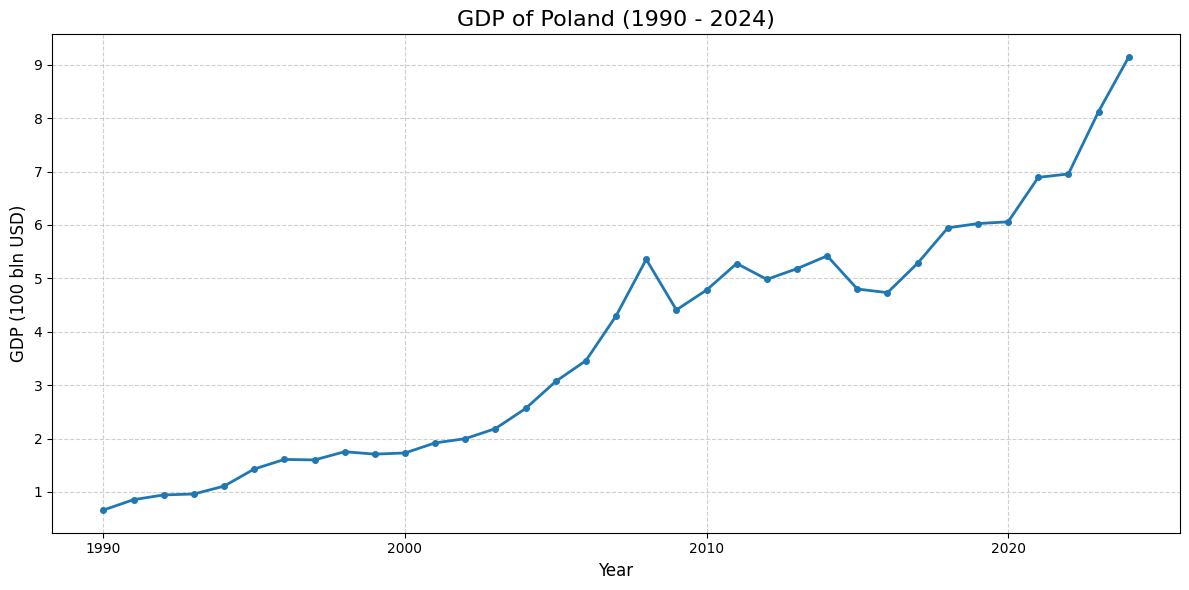

In [7]:
# Filter data for Poland
df_pol = df_economics[df_economics["country_code"] == "POL"].copy()
df_pol["gdp_scaled"] = df_pol["gdp"] / 100_000_000_000

plt.figure(figsize=(12, 6))

plt.plot(
    df_pol["year"],
    df_pol["gdp_scaled"],
    linewidth=2,
    marker="o",
    markersize=4
)

plt.title("GDP of Poland (1990 - 2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP (100 bln USD)", fontsize=12)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

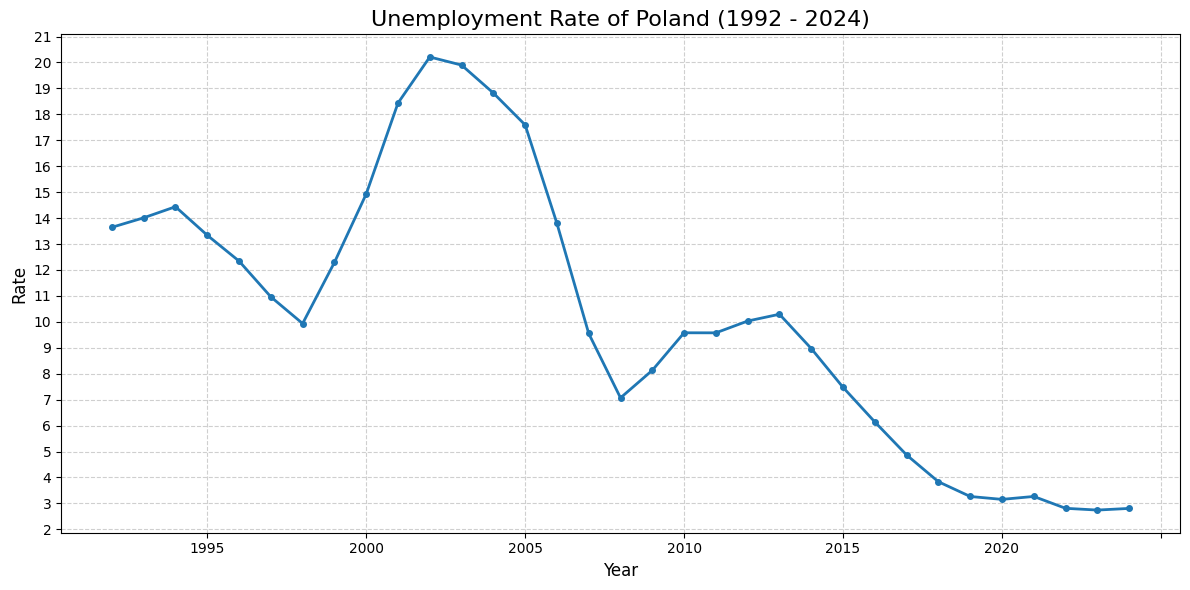

In [8]:
# Unemployment Rate of Poland
plt.figure(figsize=(12, 6))

plt.plot(
    df_pol["year"],
    df_pol["unemployment_rate"],
    linewidth=2,
    marker="o",
    markersize=4
)

plt.title("Unemployment Rate of Poland (1992 - 2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rate", fontsize=12)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Analysis of Key Economic Indicators

This section explores economic and health data across countries and regions. We include three main visualizations:

1. **GDP Distribution by Region**  
   We merge economic indicators with region information and visualize the latest year's GDP distribution across regions using a pie chart.

2. **Top 10 Countries by Health Expenditure per Capita**  
   We filter countries with available health expenditure data, select the latest year, and display the top 10 countries using a horizontal bar chart.

3. **Global Male vs Female Unemployment Rate (2000–2024)**  
   We focus on years from 2000 onward, calculate the median male and female unemployment rates globally, and visualize the trends over time with a line plot.

In [9]:
# Merge economic indicators with region information
df_merged = df_economics.merge(
    df_regions[["alpha-3", "region"]],
    left_on="country_code",
    right_on="alpha-3",
    how="left"
)

df_merged = df_merged.drop(columns=["alpha-3"])

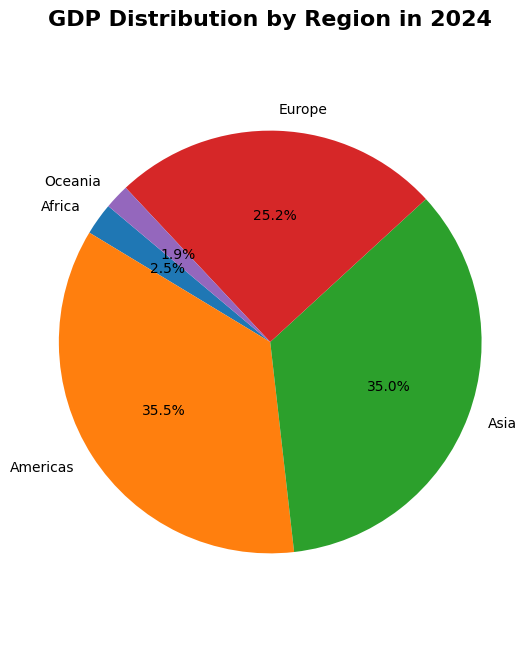

In [27]:
# Find the latest available year in the dataset
latest_year = df_merged["year"].max()

df_latest = df_merged[df_merged["year"] == latest_year]

gdp_by_region = df_latest.groupby("region")["gdp"].sum()

# Plot a pie chart showing GDP distribution by region
plt.figure(figsize=(6, 8))
plt.pie(
    gdp_by_region,
    labels=gdp_by_region.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title(f"GDP Distribution by Region in {latest_year}", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.show()

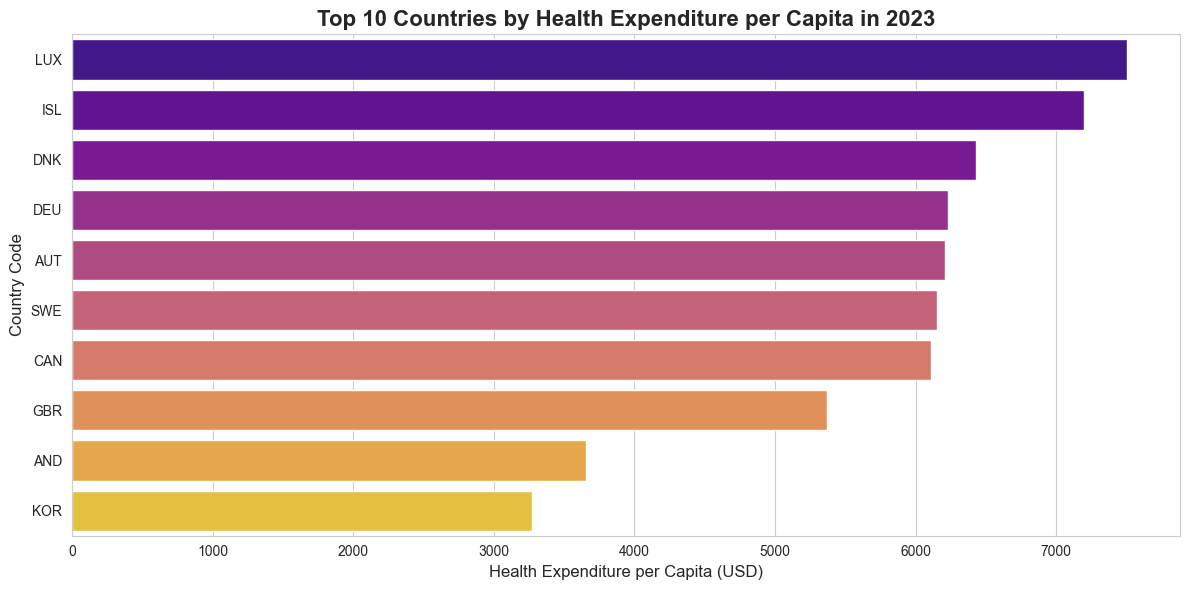

In [42]:
# Filter rows where health expenditure per capita is available
df_health = df_merged[df_merged["current_health_expenditure_per_capita"].notna()]

# Find the latest year with available health expenditure data
latest_health_year = df_health["year"].max()

df_latest_health = df_health[df_health["year"] == latest_health_year]

# Select top 10 countries by health expenditure per capita
top10_health = df_latest_health.sort_values(
    by="current_health_expenditure_per_capita", ascending=False
).head(10)

# Plot a horizontal bar chart for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_health,
    x="current_health_expenditure_per_capita",
    y="country_code",
    hue="country_code",
    dodge=False,
    legend=False, 
    palette="plasma"
)
plt.title(f"Top 10 Countries by Health Expenditure per Capita in {latest_health_year}", fontsize=16, fontweight="bold")
plt.xlabel("Health Expenditure per Capita (USD)", fontsize=12)
plt.ylabel("Country Code", fontsize=12)
plt.tight_layout()
plt.show()

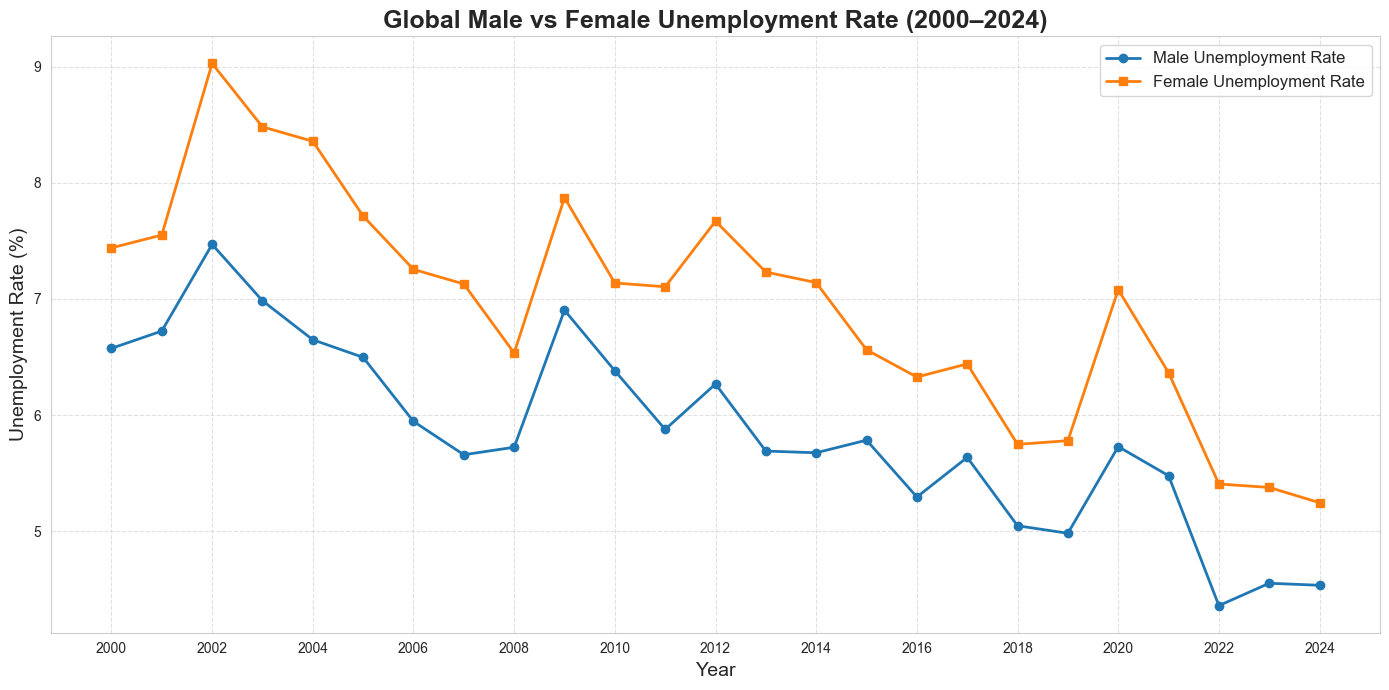

In [47]:
df_merged["year"] = df_merged["year"].astype(int)

# Filter data for years 2000 and later
df_recent = df_merged[df_merged["year"] >= 2000]

# Group by year and calculate median male and female unemployment rates globally
df_world_unemployment = df_recent.groupby("year")[
    ["male_unemployment_rate", "female_unemployment_rate"]
].median().reset_index()

# Plot the global male and female unemployment rates over time
plt.figure(figsize=(14, 7))

plt.plot(
    df_world_unemployment["year"],
    df_world_unemployment["male_unemployment_rate"],
    label="Male Unemployment Rate",
    marker="o",
    linewidth=2
)

plt.plot(
    df_world_unemployment["year"],
    df_world_unemployment["female_unemployment_rate"],
    label="Female Unemployment Rate",
    marker="s",
    linewidth=2
)

plt.title("Global Male vs Female Unemployment Rate (2000–2024)", fontsize=18, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Unemployment Rate (%)", fontsize=14)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Export Economic CSV File

In [12]:
df_economics = df_economics[df_economics["year"].str.fullmatch(r"\d{4}")]

df_economics.to_csv("df_economics.csv", index=False)